# 1. Imports


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import kurtosis


import plotly.express as px
import warnings
!pip install country_converter

import country_converter
from plotly.subplots import make_subplots
import plotly.graph_objects as go

WIDTH = 850

pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings('ignore')  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 415.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=6a5726b8adcd120176bd63f599673887369c6240e9777ce48ebd8d1743aa5e65
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter
/kaggle/input/suicidal-behaviours-among-adolescents/Originally collectedGHSH_Pooled_Data.csv
/kaggle/input/suicidal-behaviours-among-adolescents/GHSH_Pooled_Data1.csv


# 2. Heuristic Analysis

In [5]:
df_orig = pd.read_csv("../input/suicidal-behaviours-among-adolescents/GHSH_Pooled_Data1.csv")
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

# 3. Acknowledging the Data

#### Data understanding is the expertise we have about the data, the requirements it will meet, its substance, and its placement. To be clear, it is much more than just the present position and description of a data piece within an implementation or dataset.

In [6]:
df.shape #Return a tuple representing the dimensionality of the DataFrame.

(106, 17)

In [9]:
#df.head

<bound method NDFrame.head of                 Country  Year Age Group     Sex  Currently_Drink_Alcohol  \
0             Argentina  2018     13-15  Female                     50.3   
1             Argentina  2018     13-15    Male                     44.9   
2             Argentina  2018     16-17  Female                     67.2   
3             Argentina  2018     16-17    Male                     68.1   
4             Argentina  2012     13-15    Male                     49.3   
..                  ...   ...       ...     ...                      ...   
101            Vanuatu   2011     13-15  Female                      5.8   
102  Wallis and Futuna   2015     13-15    Male                     32.2   
103  Wallis and Futuna   2015     13-15  Female                     24.4   
104  Wallis and Futuna   2015     16-17    Male                     48.3   
105  Wallis and Futuna   2015     16-17  Female                     42.9   

     Really_Get_Drunk  Overwieght  Use_Marijuana  Have_Un

In [8]:
df.head()# returns the first n rows(observe the index values). The default number of elements to display is five

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [10]:
df.tail()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0
105,Wallis and Futuna,2015,16-17,Female,42.9,51.7,70.6,3.9,37.8,37.2,22.4,41.7,17.3,29.4,30.4,1.5,16.2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    float64
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               106 non-null    float64
 12  Had_figh

In [11]:
df.columns #To access the names of a Pandas dataframe

Index(['Country', 'Year', 'Age Group', 'Sex', 'Currently_Drink_Alcohol',
       'Really_Get_Drunk', 'Overwieght', 'Use_Marijuana',
       'Have_Understanding_Parents', 'Missed_classes_without_permssion',
       'Had_sexual_relation', 'Smoke_cig_currently', 'Had_fights', 'Bullied',
       'Got_Seriously_injured', 'No_close_friends', 'Attempted_suicide'],
      dtype='object')

In [54]:
def unique_values(cols):
    for col in cols :
        print ("\n Unique values of " + col + " are :" )
        print (df[col].unique())
        print ("unique values count are:" + str(len(df[col].unique())))

In [55]:
unique_values(df[['Country','Year','Age Group','Sex']])


 Unique values of Country are :
['Argentina' 'Barabados' 'Benin' 'Bhutan' 'Brunei Darussalam '
 'Dominican Republic ' 'Fiji Islands' 'Indonesia' 'Jamaica' 'Kiribati'
 'Laos' 'Malaysia' 'Mauritus' 'Mongolia' 'Namibia' 'Nepal' 'Peru' 'Samoa'
 41.25 'Seychelles' 'Suriname' 'Thailand' 'Timor-Leste '
 'Trinidad and Tobago ' 'Tuvalu ' 'Uruguay ' 'Vanuatu '
 'Wallis and Futuna ']
unique values count are:28

 Unique values of Year are :
[2018.   2012.   2011.   2016.   2014.   2015.   2017.   2013.   2010.
   41.25]
unique values count are:10

 Unique values of Age Group are :
['13-15' '16-17' 41.25]
unique values count are:3

 Unique values of Sex are :
['Female' 'Male' 41.25]
unique values count are:3


In [56]:
df_mean = df.groupby('Country')[['Attempted_suicide']].mean().sort_values('Attempted_suicide',ascending = False)
fig_bar = px.bar(x = df_mean.index, y = df_mean.Attempted_suicide, color = df_mean.Attempted_suicide, color_continuous_scale='dense')
fig_bar.update_layout(width = WIDTH, height = 500, title_text="suicide rates by Country")
fig_bar.update_xaxes(title = 'Country')
fig_bar.update_yaxes(title = 'Suicide rate')
fig_bar.show()

In [57]:
df.groupby('Sex')[['Attempted_suicide']].mean()

,Attempted_suicide
Sex,
41.25,41.250000
Female,14.380769
Male,12.738679


In [58]:
df['Country_iso3'] = country_converter.convert(names=df['Country'], to="ISO3")

In [59]:
fig = px.choropleth(df.sort_values('Year'),locations='Country_iso3',
                    color='Attempted_suicide',
                    color_continuous_scale='dense',
                    title = 'Attempted_suicide per Country and Year', 
                    animation_frame='Year',
                    
                   )
fig.update_layout(width = WIDTH, height = 600, title_text="Attempted_suicide per Country and Year")
fig.show()

In [60]:
df_mean = df.groupby('Country_iso3')[['Attempted_suicide']].mean().sort_values('Attempted_suicide',ascending = False)
fig = px.choropleth(locations=df_mean.index,
                    color=df_mean['Attempted_suicide'],
                    color_continuous_scale='dense',
                    title = 'Mean suicide rate per Country')


fig.update_layout(width = WIDTH, height = 600, title_text="Mean suicide rate per Country")
fig.show()

In [61]:
fig = px.histogram(df, x = 'Attempted_suicide', color = 'Sex', marginal="box", opacity = 0.8,
                   color_discrete_sequence = ['black', 'gray', 'blue'])

fig.update_layout(width = WIDTH, title_text="Distribution of Salaries per Year")
fig.show()

In [62]:
df.loc[32,'Currently_Drink_Alcohol'] = 54.8
## we ha an oultlier here with Currently_Drink_Alcohol set as 548% , will assume it was 54.8

In [12]:
df.describe()
#Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


# 4. Data Pre-processing and Data Cleaning (The most important part of Data Science)

In [14]:
df.isnull().sum() #checking for the empty values

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

##### We can see that there are 6 missing data in 2 of the columns. In particular, there are two missing items in the column Smoke cig currently and four missing data in the column Bullied.

<AxesSubplot:>

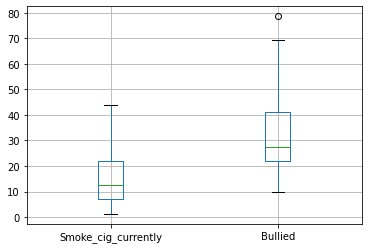

In [15]:
bp=df.boxplot(column=['Smoke_cig_currently', 'Bullied'])
bp

##### These duplicates are also visible in the summary statistics. Let us now treat these NAs by imputing them with the mean or the median otherwise.

In [16]:
df['Bullied'] = df['Bullied'].fillna(df['Bullied'].median())
df['Smoke_cig_currently'] = df['Smoke_cig_currently'].fillna(df['Smoke_cig_currently'].mean())

In [17]:
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 0
Had_fights                          0
Bullied                             0
Got_Seriously_injured               0
No_close_friends                    0
Attempted_suicide                   0
dtype: int64

In [18]:
df['Country'].value_counts()

Argentina               6
Samoa                   6
Vanuatu                 6
Mongolia                6
Brunei Darussalam       4
Namibia                 4
Benin                   4
Trinidad and Tobago     4
Timor-Leste             4
Thailand                4
Suriname                4
Seychelles              4
Bhutan                  4
Dominican Republic      4
Nepal                   4
Mauritus                4
Malaysia                4
Laos                    4
Jamaica                 4
Indonesia               4
Fiji Islands            4
Wallis and Futuna       4
Barabados               2
Peru                    2
Kiribati                2
Tuvalu                  2
Uruguay                 2
Name: Country, dtype: int64

# 5. Data Redundancy

#### Data redundancy happens when the same piece of data appears in several places, whereas data inconsistency arises when the same data appears in multiple tables in different forms. 
#### Unfortunately, data redundancy may lead to data inconsistency, which can offer a business with untrustworthy and/or nonsensical data.

In [19]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

##### We can see here no duplicate values to be dealt with.

# 6. Data Analysis and Visualization

## *6.1 Numerical Data*

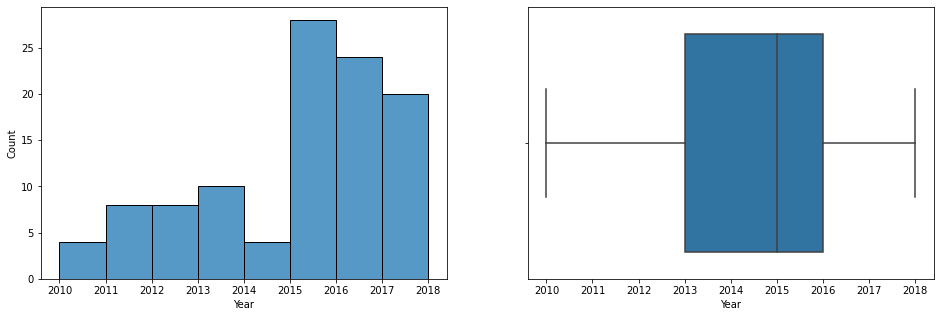

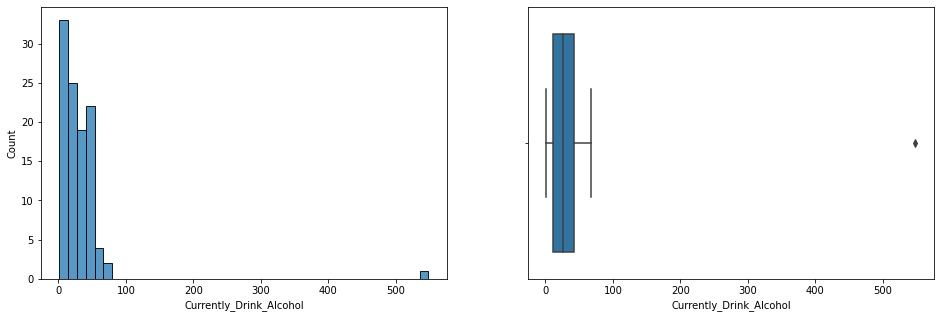

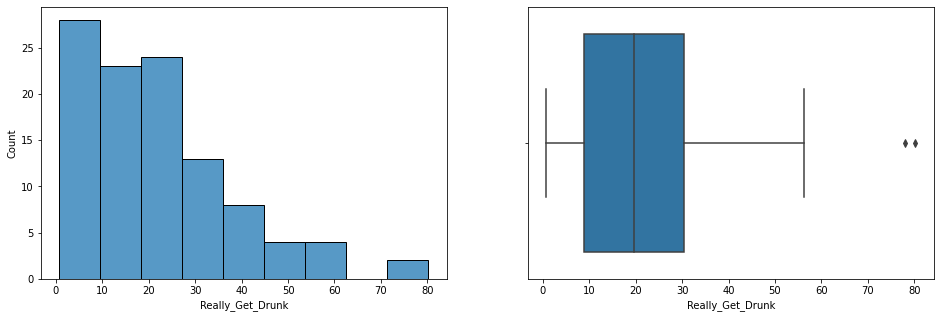

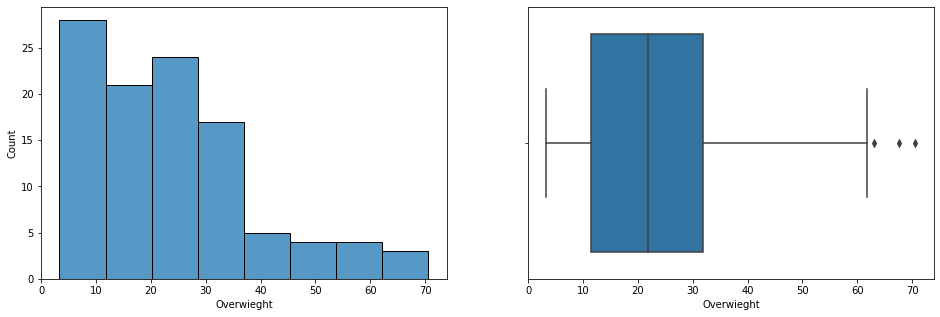

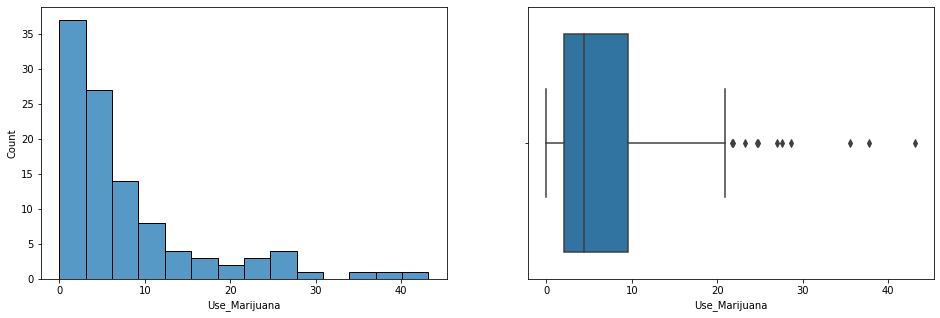

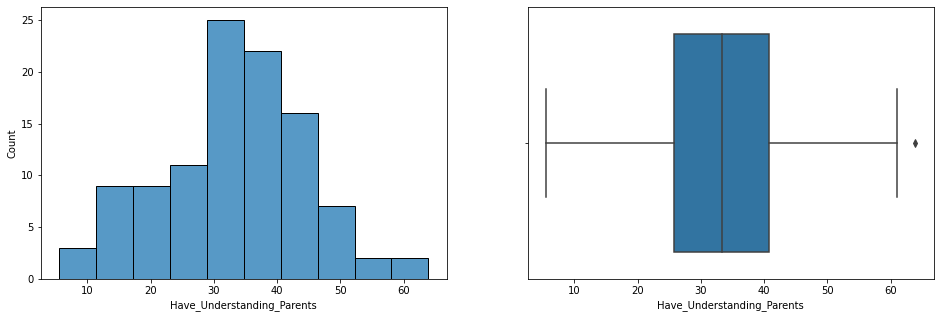

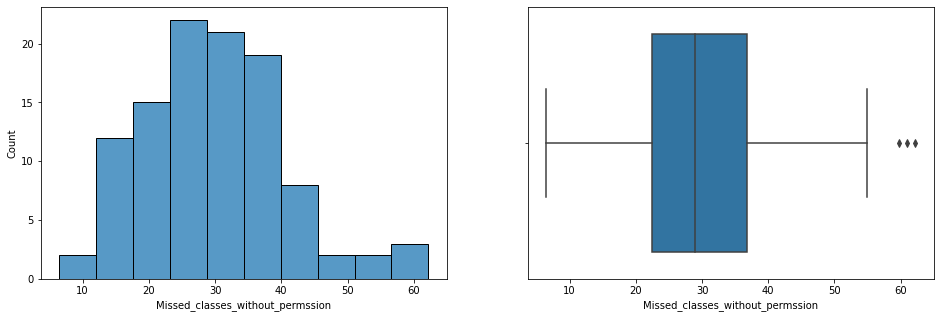

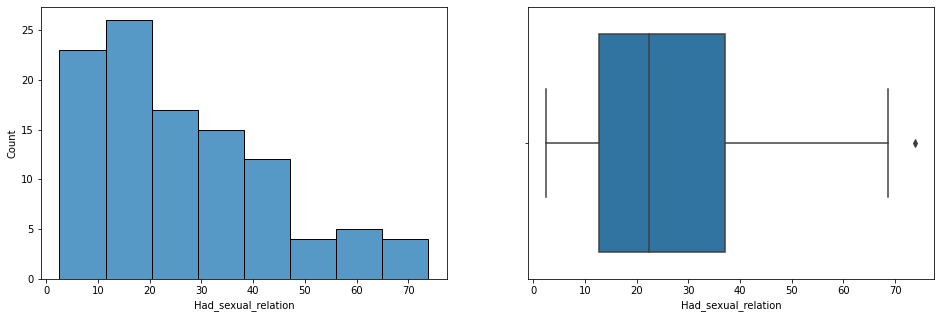

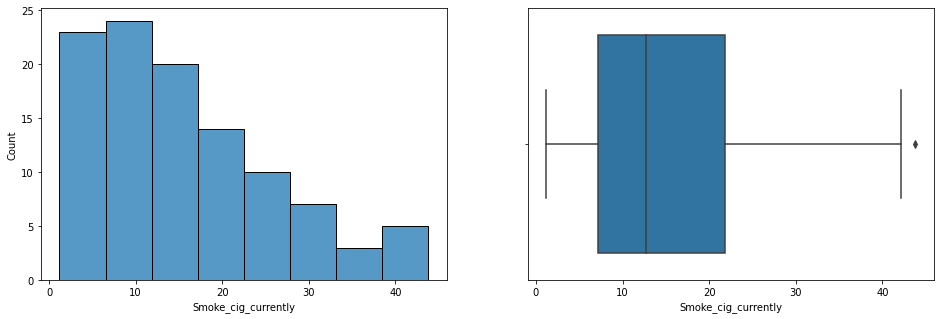

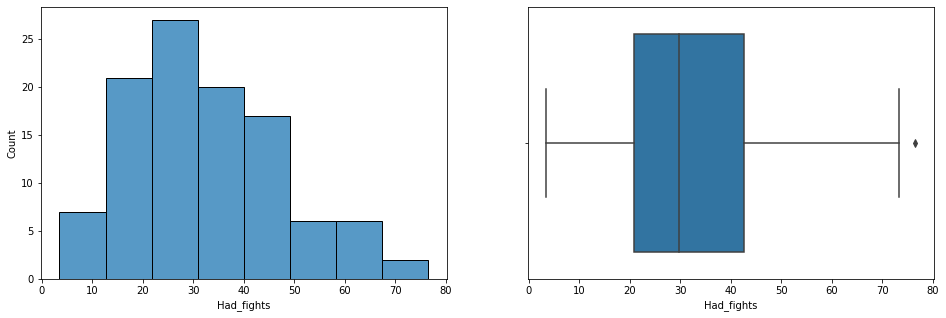

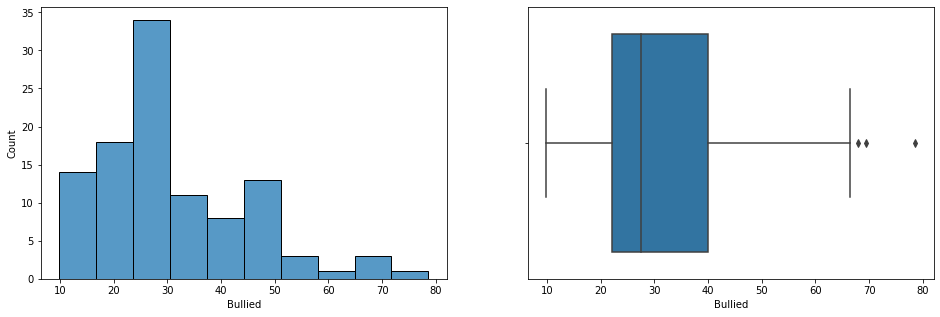

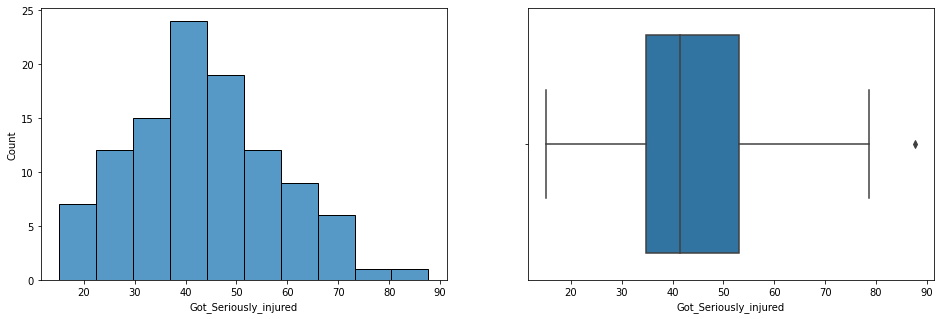

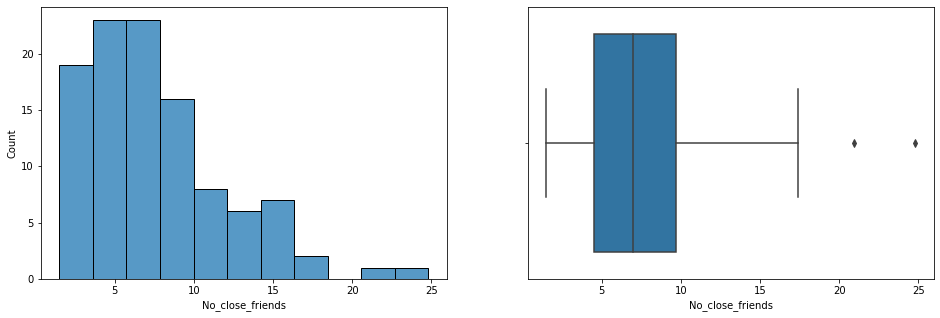

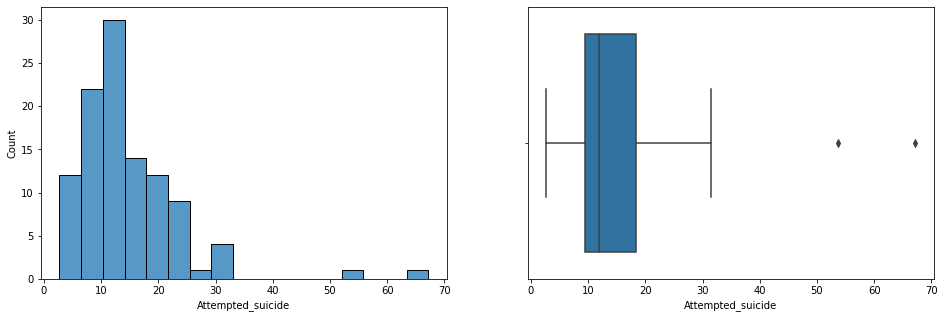

In [20]:
df_num = df.select_dtypes(exclude=object)
for col in df_num.columns:
  fig, ax = plt.subplots(1, 2, figsize=(16,5))
  sns.histplot(data=df_num, x=col, ax=ax[0])
  sns.boxplot(data=df_num, x=col, ax=ax[1])

## *6.2 Skewness*

#### Skewness is a measure of a distribution's asymmetry. When a distribution's left and right sides left and right sides of a distribution are not mirrored reflections, it is said to be asymmetrical.

#### It is positively skewed if the coefficient skewness is more than 0.5 or less than -.05.

In [21]:
for col in df_num.columns:
  sk = df_num[col].skew(axis = 0, skipna = True)
  if (sk > 0.5) or (sk< -0.5):
    print(col," with ",sk," is positively skewed! ")
  else:
    print(col, " with ", sk, " is normal!")

Year  with  -0.6747829667213993  is positively skewed! 
Currently_Drink_Alcohol  with  8.72240011821513  is positively skewed! 
Really_Get_Drunk  with  1.0681357097128723  is positively skewed! 
Overwieght  with  1.0217711927881141  is positively skewed! 
Use_Marijuana  with  1.9551260406876132  is positively skewed! 
Have_Understanding_Parents  with  -0.07823155633489849  is normal!
Missed_classes_without_permssion  with  0.6622276079014395  is positively skewed! 
Had_sexual_relation  with  0.8350487256553063  is positively skewed! 
Smoke_cig_currently  with  0.7976513931202183  is positively skewed! 
Had_fights  with  0.6013390001733574  is positively skewed! 
Bullied  with  1.025024010030998  is positively skewed! 
Got_Seriously_injured  with  0.3769107550230587  is normal!
No_close_friends  with  1.1378773150825803  is positively skewed! 
Attempted_suicide  with  2.6330983026478987  is positively skewed! 


## *6.3 Kurtosis*

#### Kurtosis is a measure of a distribution's tailness. Tailedness is the frequency with which outliers occur. The tailedness of a distribution in comparison to a normal distribution is defined as excess kurtosis. Mesokurtic distributions have medium kurtosis (medium tails).

#### 1) Leptokurtic(>3) is having very long and skinny tails, which means there are more chances of outliers
#### 2) Platykurtic(<3) is having a lower tail and stretched around center tails means most of the data points are present in high proximity with mean
#### 3) Mesokurtic(=3) is the same as the normal distribution, which means kurtosis is near to 0.

In [22]:
for col in df_num.columns:
  kt = kurtosis(df_num[col], axis=0, bias=True)
  if kt > 3:
    print(col," with ",kt," is Leptokurtic! Higher chance of outliers!")
  elif kt < 3:
    print(col," with ",kt," is Platykurtic! Medium chance of outliers!")
  else:
    print(col," with ",kt," is Mesokurtic! No chance of outliers!")

Year  with  -0.5038731521850748  is Platykurtic! Medium chance of outliers!
Currently_Drink_Alcohol  with  80.62752755626853  is Leptokurtic! Higher chance of outliers!
Really_Get_Drunk  with  1.1341720087526914  is Platykurtic! Medium chance of outliers!
Overwieght  with  0.5931617297110803  is Platykurtic! Medium chance of outliers!
Use_Marijuana  with  3.6252171439762817  is Leptokurtic! Higher chance of outliers!
Have_Understanding_Parents  with  -0.18424241927812668  is Platykurtic! Medium chance of outliers!
Missed_classes_without_permssion  with  0.5396513226583868  is Platykurtic! Medium chance of outliers!
Had_sexual_relation  with  -0.18958256140966867  is Platykurtic! Medium chance of outliers!
Smoke_cig_currently  with  -0.10753296282744262  is Platykurtic! Medium chance of outliers!
Had_fights  with  0.009194109164273545  is Platykurtic! Medium chance of outliers!
Bullied  with  0.8792488056480527  is Platykurtic! Medium chance of outliers!
Got_Seriously_injured  with  -0.

## *6.4 Caegorical Data*

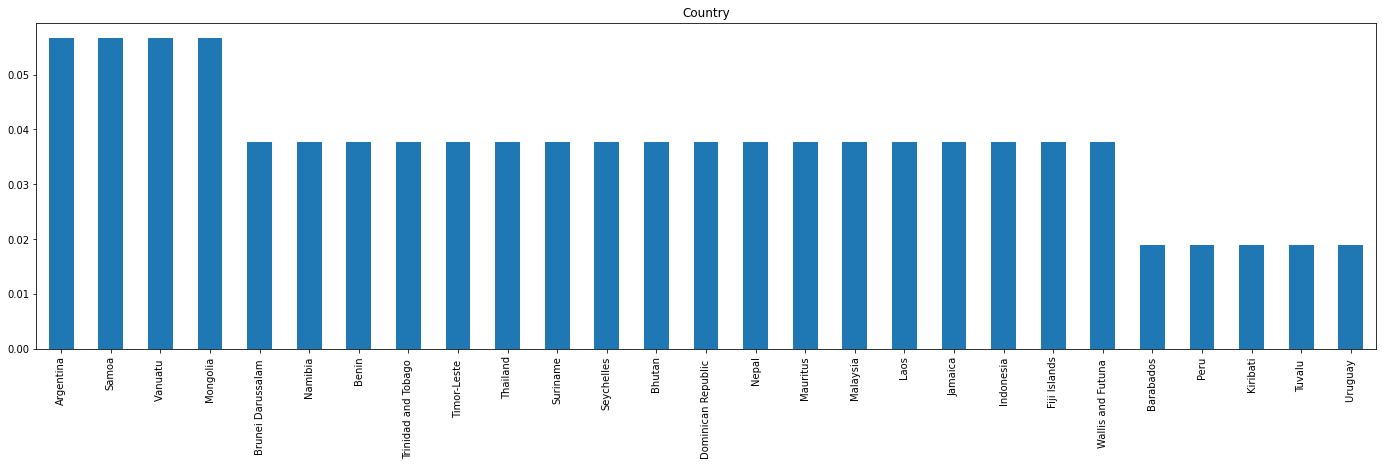

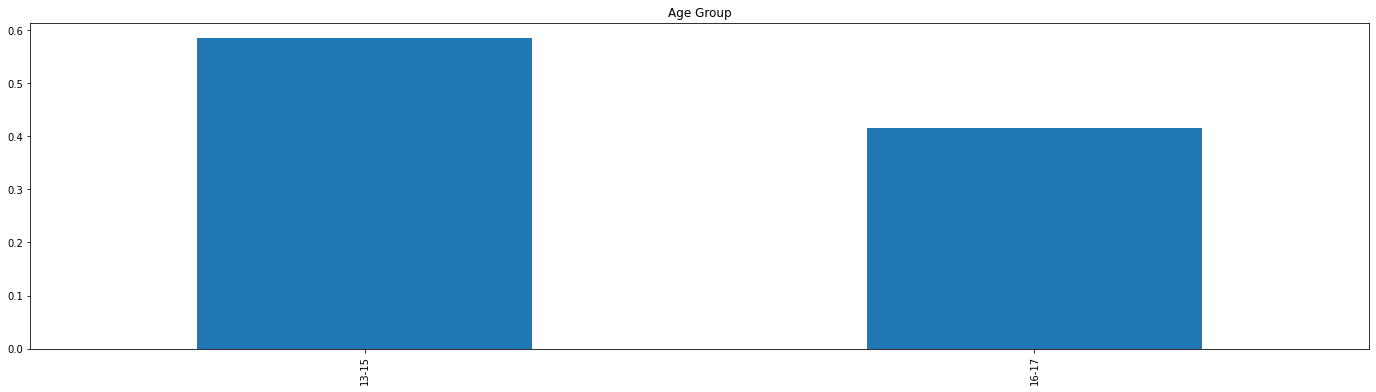

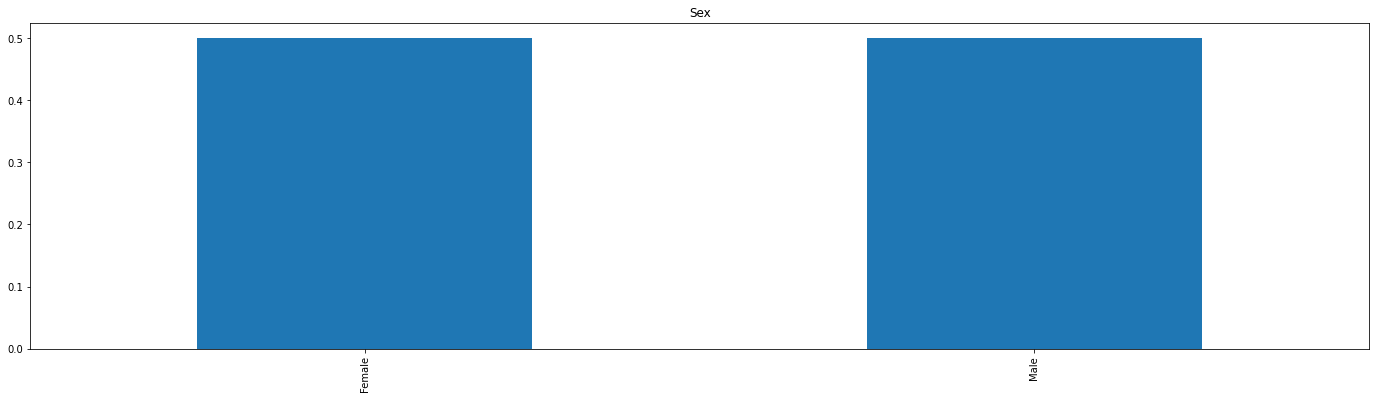

In [23]:
df_cat = df.select_dtypes(include=object)
for col in df_cat.columns:
  fig, ax = plt.subplots(1, 1, figsize=(16,5))
  df_cat[col].value_counts(normalize=True).plot.bar(figsize = (24,6), title=col)

##### 1) More number of records from the year 2015 to 2018.
##### 2) Only two age groups where more number of records are from the 13-15 years of age group.
##### 3) Almost similar number of observations recorded from females and males.
##### 4) Records from around 27 different countries.

# 7. Bivariate Analysis

#### Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.



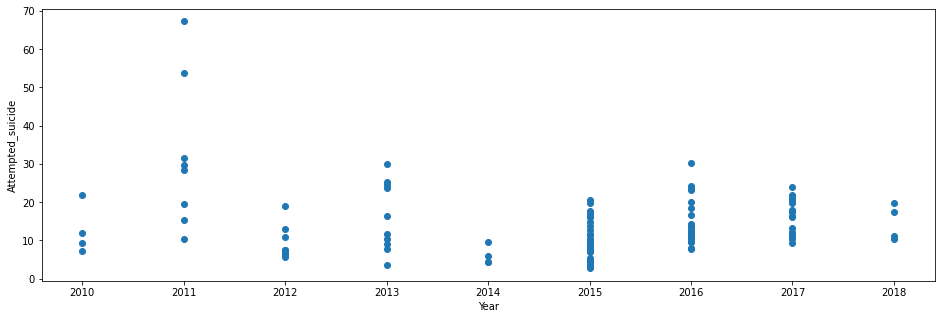

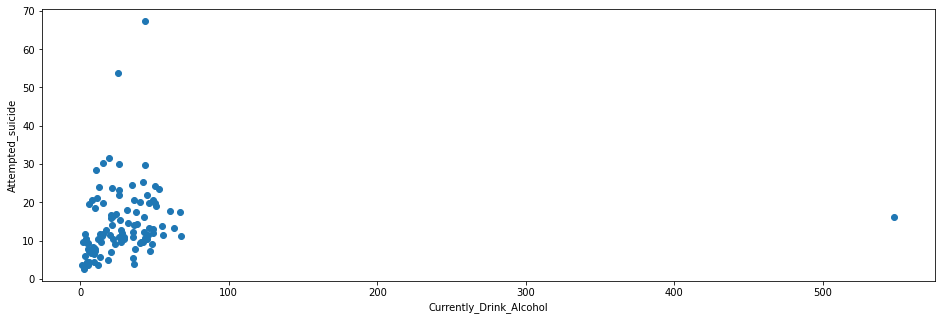

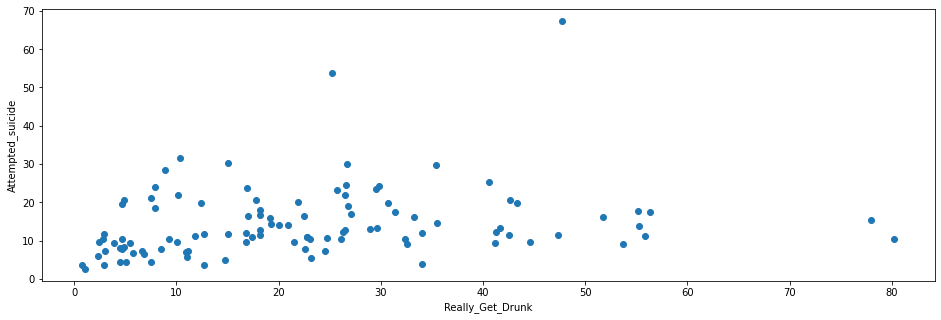

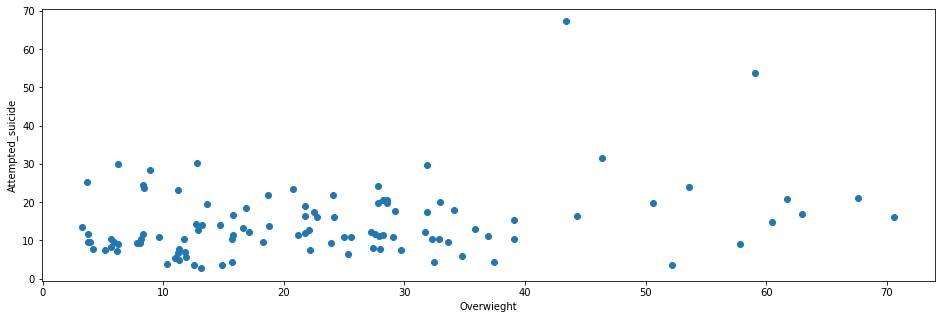

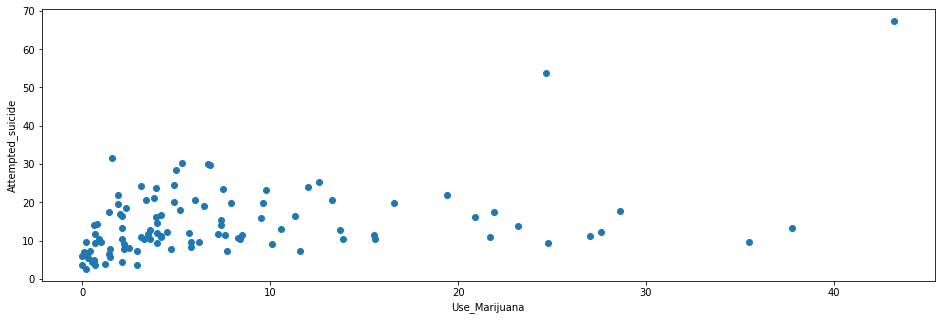

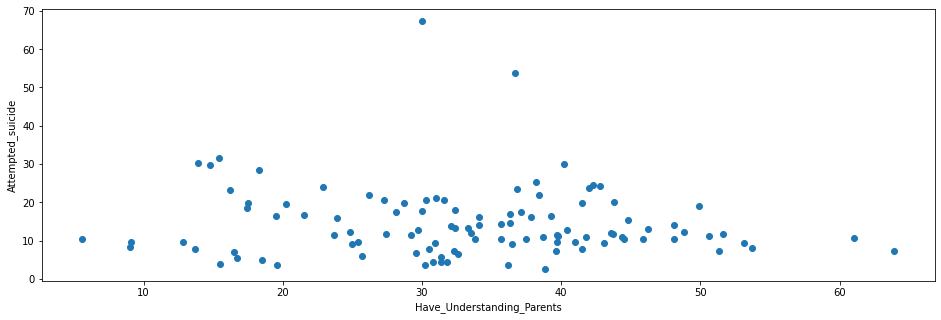

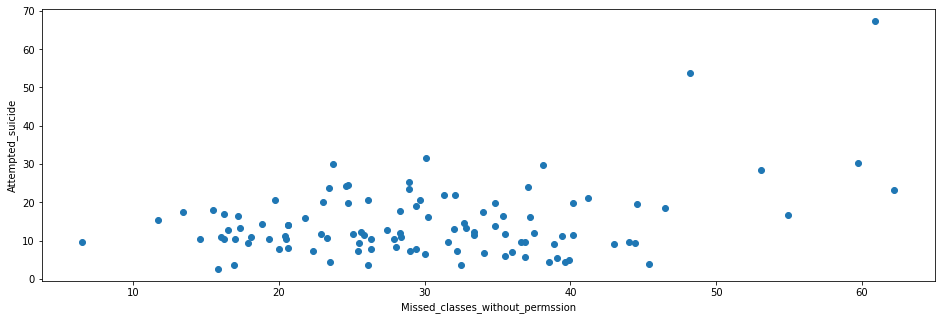

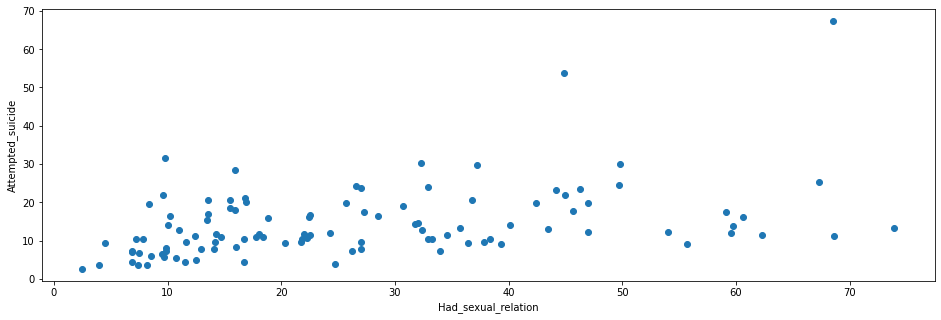

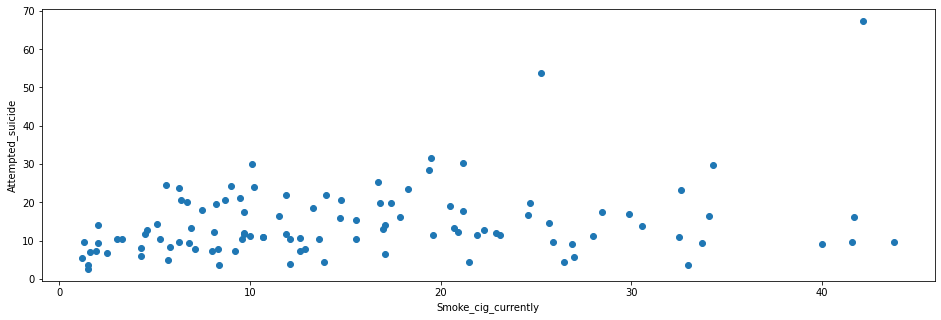

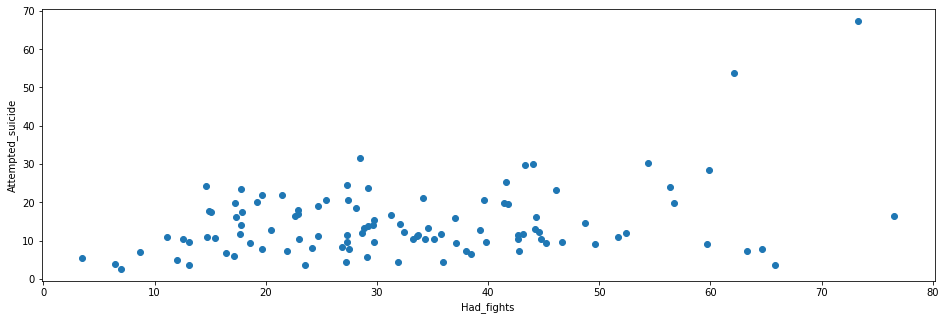

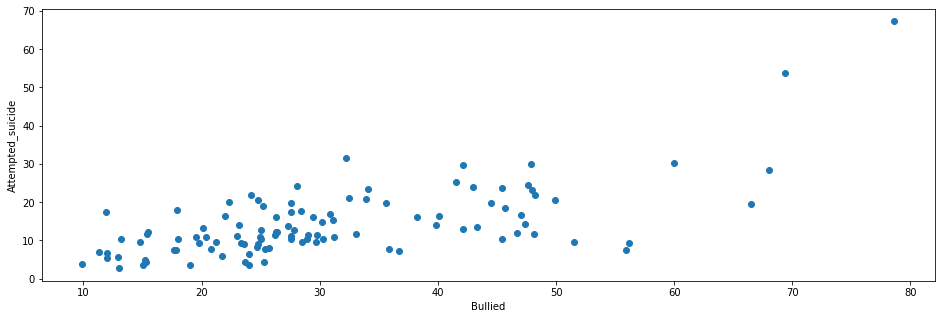

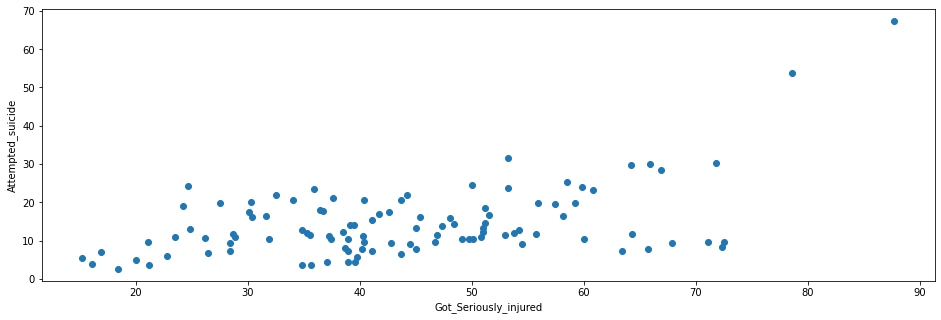

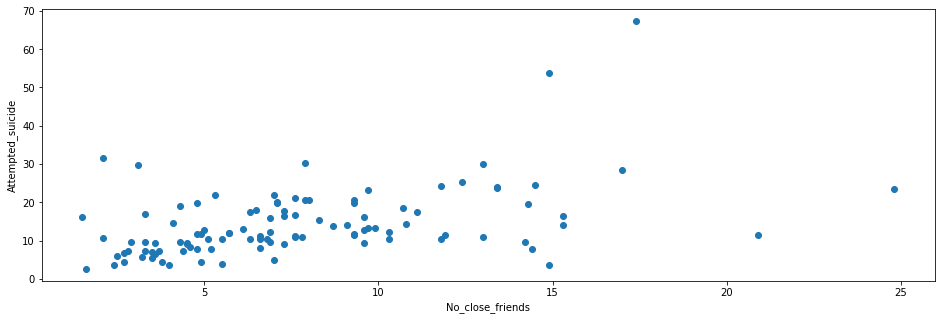

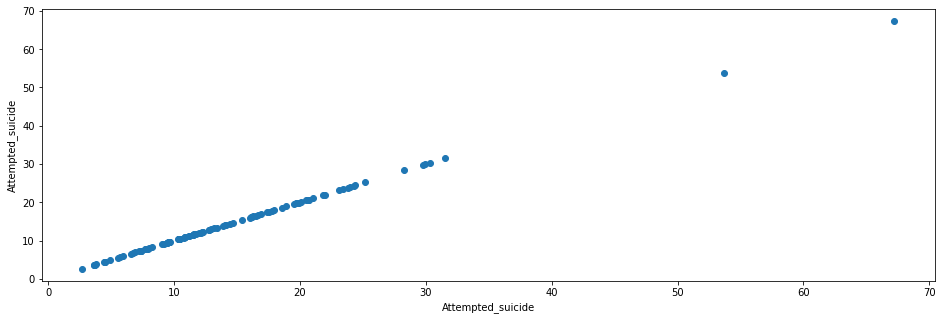

In [24]:
for col in df_num.columns:
  fig, ax = plt.subplots(1,figsize=(16,5))
  plt.scatter(df[col], df['Attempted_suicide'])
  plt.xlabel(col)
  plt.ylabel('Attempted_suicide')

#### Our output variable as in class label is the column Attempted_suicide which determines the rate of suicidal behavior in an individual.

##### Because of this one outlier on the extreme bottom right of the first chart, the distribution is getting affected.

##### All of our numerical variables have a moderate to slightly strong positive relationship with the class label Attempted_suicide which indicates that all these variables do have a significant effect on the rate of suicide attempts.

##### The data points are not too dense and hence there could be varied response recorded

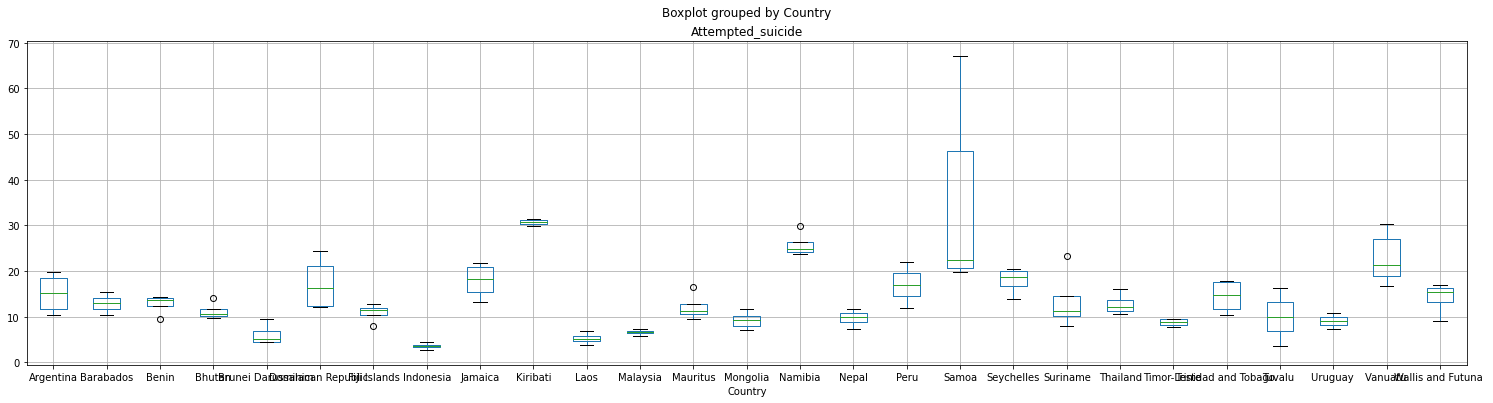

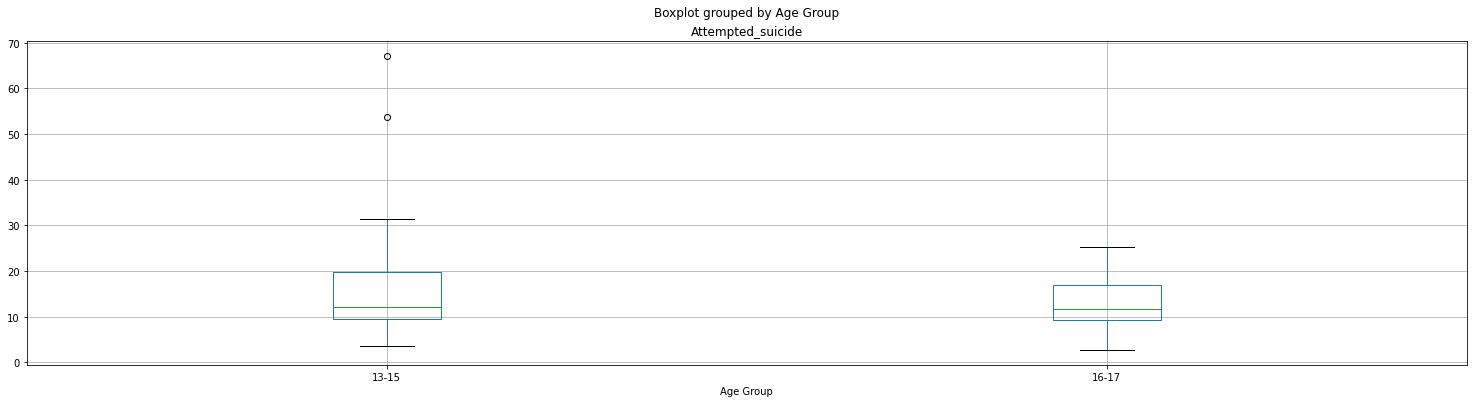

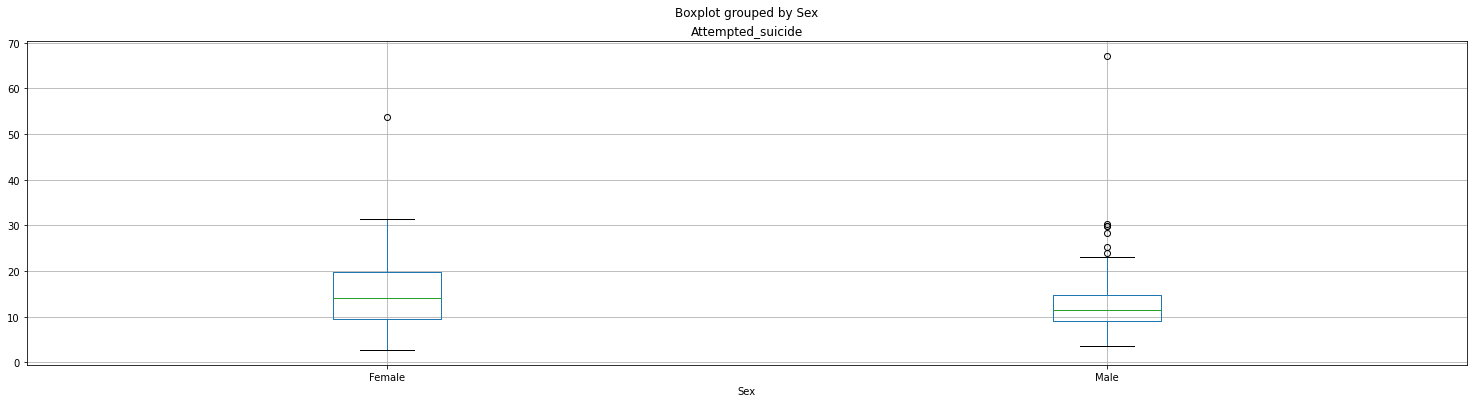

In [25]:
for col in df_cat.columns:
  df.boxplot(column = 'Attempted_suicide', by = col,figsize=(25,6))

##### 1) The median suicidal rate is pretty much the same for both the sexes. But, the range of females is more.
##### 2) The median suicidal rate is pretty much the same for both the age groups. But, the range of 13-15 age group is more.
##### 3) The highest median suicidal rate is for Kiribati although the range of people is pretty much less comparatively and its the vice versa for Samoa.

# 8. Feature Engineering and Feature Transformation

## *8.1 For Attempted_suicide*

In [27]:
max(df['Attempted_suicide'])

67.2

In [28]:
med = df['Attempted_suicide'].median()

In [29]:
df['Attempted_suicide'].replace(67.2,med,inplace=True)

In [30]:
max(df['Attempted_suicide'])

53.7

In [31]:
med = df['Attempted_suicide'].median()

In [32]:
df['Attempted_suicide'].replace(53.7,med,inplace=True)

<AxesSubplot:xlabel='Attempted_suicide'>

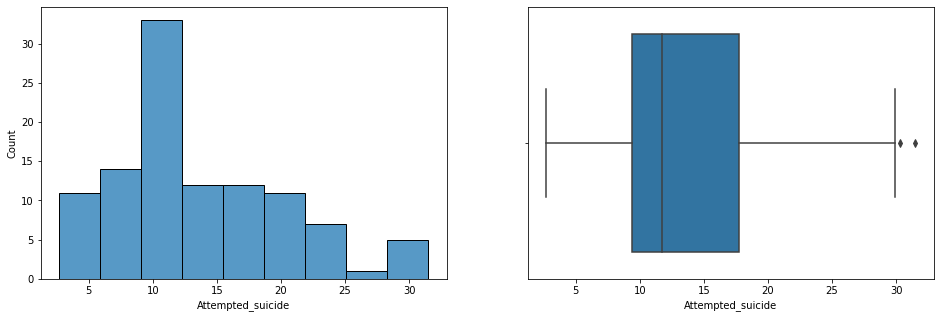

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Attempted_suicide'], ax=ax[0])
sns.boxplot(data=df, x=df['Attempted_suicide'], ax=ax[1])

## *8.2 For Currently_Drink_Alcohol*

In [34]:
max(df['Currently_Drink_Alcohol'])

548.0

In [35]:
df['Attempted_suicide'].replace(548.0,med,inplace=True) #This value could be 54.8 so it could be some data entry level

In [36]:
df['Attempted_suicide'].replace(548.0,med,inplace=True)

Text(0, 0.5, 'Attempted_suicide')

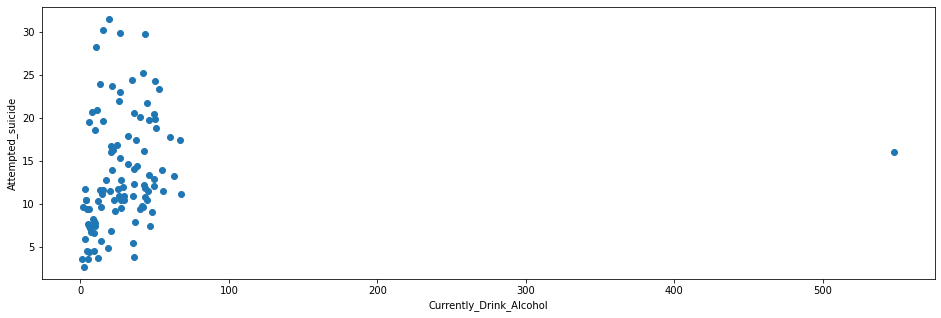

In [37]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['Currently_Drink_Alcohol'], df['Attempted_suicide'])
plt.xlabel('Currently_Drink_Alcohol')
plt.ylabel('Attempted_suicide')

<AxesSubplot:xlabel='Currently_Drink_Alcohol'>

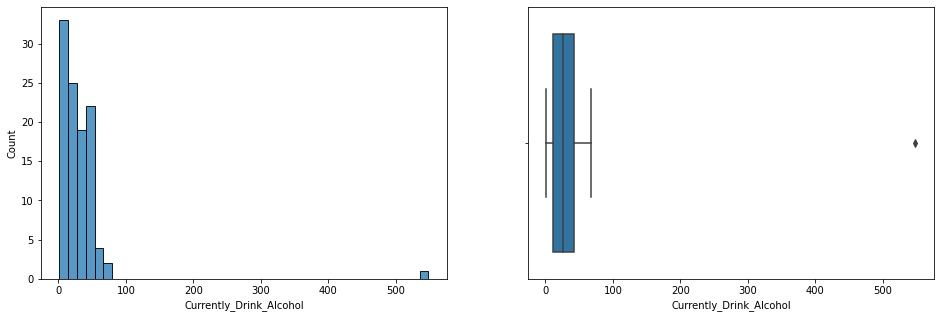

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Currently_Drink_Alcohol'], ax=ax[0])
sns.boxplot(data=df, x=df['Currently_Drink_Alcohol'], ax=ax[1])

## *8.3 For Got_Seriously_Injured*

In [39]:
max(df['Got_Seriously_injured'])

87.7

In [40]:
med = df['Got_Seriously_injured'].median()
df['Got_Seriously_injured'].replace(87.7,med,inplace=True)

In [41]:
#df[df['Got_Seriously_injured'] == max(df['Got_Seriously_injured'])] = df['Got_Seriously_injured'].median()

Text(0, 0.5, 'Attempted_suicide')

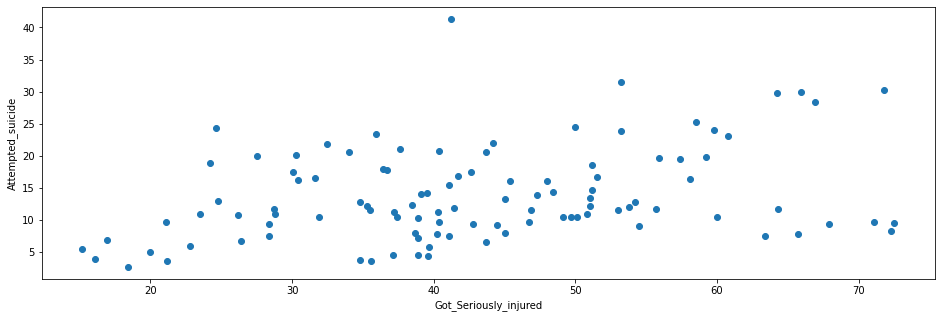

In [42]:
fig, ax = plt.subplots(1,figsize=(16,5))
plt.scatter(df['Got_Seriously_injured'], df['Attempted_suicide'])
plt.xlabel('Got_Seriously_injured')
plt.ylabel('Attempted_suicide')

<AxesSubplot:xlabel='Got_Seriously_injured'>

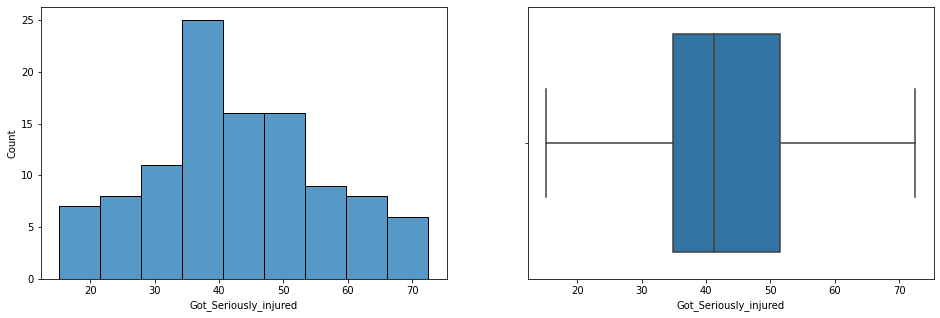

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(data=df, x=df['Got_Seriously_injured'], ax=ax[0])
sns.boxplot(data=df, x=df['Got_Seriously_injured'], ax=ax[1])

# 9. Attribute Section

## *9.1 Correlation Analysis*

In [44]:
cor_df_num = df_num.corr()
cor_df_num

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
Year,1.000000,0.188742,0.091310,0.087593,0.168638,0.024212,-0.117785,0.216648,-0.002095,-0.233693,-0.255873,-0.125611,0.132952,-0.165606
Currently_Drink_Alcohol,0.188742,1.000000,0.311971,0.037212,0.318670,0.085079,0.002931,0.418399,0.141111,0.036944,-0.032602,-0.012972,0.131297,0.098731
Really_Get_Drunk,0.091310,0.311971,1.000000,0.191082,0.604226,0.199064,0.029132,0.674573,0.513520,0.052409,0.013765,0.066561,0.206292,0.235646
Overwieght,0.087593,0.037212,0.191082,1.000000,0.121040,0.092736,0.063789,0.083223,0.239976,0.189777,-0.011707,-0.050310,0.053527,0.288114
Use_Marijuana,0.168638,0.318670,0.604226,0.121040,1.000000,0.105225,0.261242,0.675593,0.551950,0.346987,0.155149,0.310927,0.266877,0.403062
Have_Understanding_Parents,0.024212,0.085079,0.199064,0.092736,0.105225,1.000000,-0.483356,0.080762,-0.112879,-0.077071,-0.043389,-0.221525,-0.000703,-0.081001
Missed_classes_without_permssion,-0.117785,0.002931,0.029132,0.063789,0.261242,-0.483356,1.000000,0.296897,0.500790,0.395450,0.353801,0.368259,0.086721,0.341590
Had_sexual_relation,0.216648,0.418399,0.674573,0.083223,0.675593,0.080762,0.296897,1.000000,0.440192,0.293354,0.244234,0.351281,0.405993,0.405801
Smoke_cig_currently,-0.002095,0.141111,0.513520,0.239976,0.551950,-0.112879,0.500790,0.440192,1.000000,0.413805,0.158853,0.379659,0.063804,0.270299
Had_fights,-0.233693,0.036944,0.052409,0.189777,0.346987,-0.077071,0.395450,0.293354,0.413805,1.000000,0.533894,0.666807,0.304187,0.338233


<AxesSubplot:>

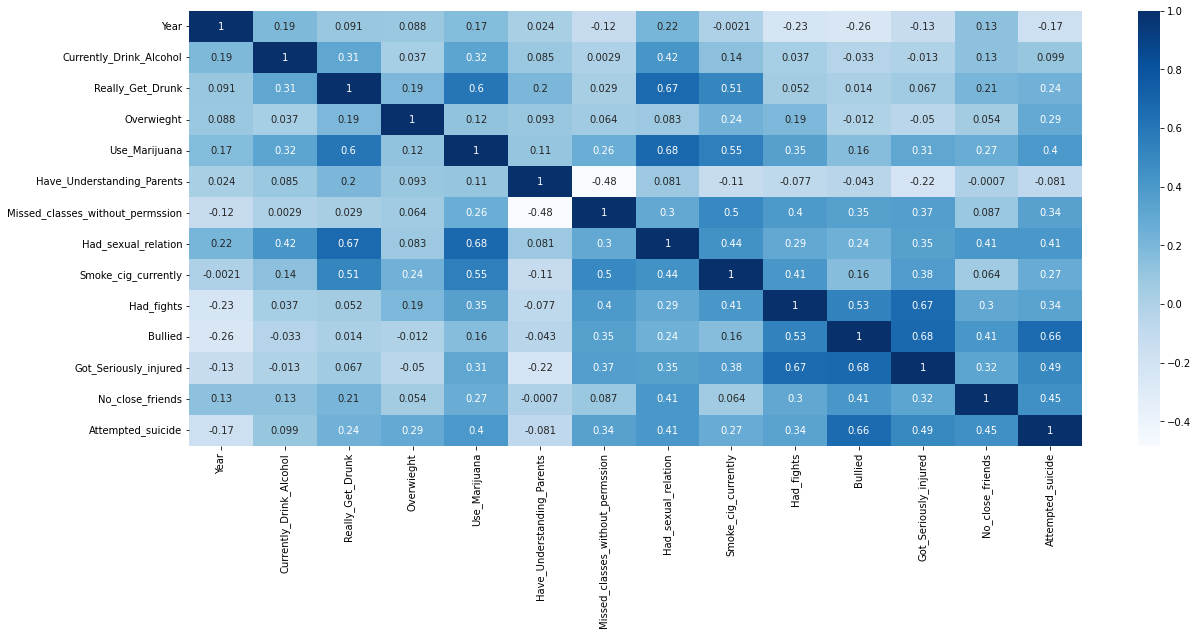

In [45]:
plt.figure(figsize = (20,8))
sns.heatmap(cor_df_num,annot=True,cmap='Blues')

##### The features of interest are those which have a correlation coefficient close to +1 or -1. Any value that above 0.65 or less than -0.65 will be considered.

# 10. Diagnostic Analysis

## *10.1 Overweight people get bullied more often based on country*

In [46]:
df.groupby(['Overwieght','Bullied'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = False)

,,Attempted_suicide
Overwieght,Bullied,
41.25,41.25,41.25
46.40,32.20,31.50
12.80,60.00,30.30
6.30,47.90,29.90
31.90,42.10,29.80
...,...,...
10.30,9.90,3.80
12.60,24.00,3.70
52.20,15.00,3.60


##### Based on the results, we may conclude that if someone has an overweight problem and is regularly bullied, they are more likely to try suicide. In the opposite situation, when someone with an overweight problem is not bullied. There is a slim possibility that they may try suicide. Furthermore, these are the most examples that highlight the most suicidal cases throughout the world; as educated people, we must comprehend their difficulties and assist them rather than bullying them. Support them through thick and thin, and by doing so, we can boost their confidence and help them settle into their new life.

## *10.2 The age group of kids that had sexual relation attempted suicide*

In [47]:
df.groupby(['Age Group','Had_sexual_relation'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Age Group Had_sexual_relation                   
16-17     2.50                              2.70
13-15     4.00                              3.60
          8.20                              3.60
16-17     7.40                              3.70
          24.70                             3.80
...                                          ...
13-15     37.20                            29.80
          49.80                            29.90
          32.30                            30.30
          9.80                             31.50
41.25     41.25                            41.25

[97 rows x 1 columns]

##### According to the results, the age group 13-15 with the highest rate of sexual relationship attempted suicide the most.

## *10.3 The gender of teens that were overweight attempted suicide*

In [48]:
df.groupby(['Sex','Overwieght'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    Overwieght                   
Female 13.10                    2.70
       14.90                    3.60
       52.20                    3.60
Male   12.60                    3.70
       10.30                    3.80
...                              ...
       8.90                    28.30
       31.90                   29.80
       12.80                   30.30
Female 46.40                   31.50
41.25  41.25                   41.25

[100 rows x 1 columns]

##### According to the findings, females who are overweight attempt suicide more frequently than those who are not.

## *10.4 Based on gender did they commit suicide if they had no friends*

In [49]:
df.groupby(['Sex','No_close_friends'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    No_close_friends                   
Female 1.60                           2.70
       2.40                           3.60
       14.90                          3.60
Male   4.00                           3.70
       3.80                           4.40
...                                    ...
       17.00                         28.30
       3.10                          29.80
       13.00                         29.90
       7.90                          30.30
41.25  41.25                         41.25

[86 rows x 1 columns]

##### If the youths, either men or girls, did not have close companions, there is little indication that they tried suicide.

## *10.5 Attempted Suicide Rate by country based on Gender*

In [50]:
df.groupby(['Sex','Country'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

Attempted_suicide
Sex    Country                                
Female Indonesia                      3.150000
       Tuvalu                         3.600000
Male   Indonesia                      4.050000
       Laos                           4.350000
       Brunei Darussalam              4.500000
       Malaysia                       6.150000
Female Laos                           6.200000
       Malaysia                       7.050000
Male   Uruguay                        7.400000
Female Brunei Darussalam              7.750000
       Timor-Leste                    8.000000
Male   Mongolia                       8.033333
       Nepal                          8.400000
       Timor-Leste                    9.550000
Female Fiji Islands                   9.600000
Male   Suriname                       9.700000
       Bhutan                        10.300000
       Barabados                     10.400000
       Mauritus                      10.450000
Female Mongolia                      10.466667
       Uruguay                       10.800000
       Nepal                         11.050000
Male   Trinidad and Tobago           11.300000
       Argentina                     11.500000
Female Thailand                      11.650000
       Benin                         11.850000
Male   Wallis and Futuna             11.850000
       Peru                          12.000000
Female Bhutan                        12.150000
Male   Dominican Republic            12.200000
       Fiji Islands                  12.200000
Female Mauritus                      13.700000
Male   Thailand                      13.750000
       Benin                         13.900000
       Jamaica                       14.650000
Female Barabados                     15.400000
Male   Tuvalu                        16.300000
Female Wallis and Futuna             16.550000
Male   Seychelles                    16.850000
Female Suriname                      17.150000
       Trinidad and Tobago           17.700000
       Vanuatu                       18.266667
Male   Samoa                         18.516667
Female Argentina                     18.733333
       Seychelles                    19.150000
       Samoa                         20.850000
       Jamaica                       21.200000
       Peru                          22.000000
       Dominican Republic            22.200000
       Namibia                       24.100000
Male   Vanuatu                       27.233333
       Namibia                       27.550000
       Kiribati                      29.800000
Female Kiribati                      31.500000
41.25  41.25                         41.250000

##### In general, female adolescent suicide attempts outnumber male adolescent suicide attempts in any country.

## *10.6 The teens had understanding parents if they less or more fights*

In [51]:
df.groupby(['Had_fights','Have_Understanding_Parents'])[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending = True)

,,Attempted_suicide
Had_fights,Have_Understanding_Parents,
7.00,38.80,2.70
13.10,36.20,3.60
65.80,19.60,3.60
23.50,30.20,3.70
6.40,15.50,3.80
...,...,...
43.30,14.80,29.80
44.00,40.20,29.90
54.40,13.90,30.30


##### In general, those who had fewer fights had more understanding parents than those who had more fights.